In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('combined_comments.csv')

In [3]:
df

,Document ID,Comment
0,CDC-2025-0454-0002,The new restrictions on COVID vaccines only ma...
1,CDC-2025-0454-0003,Please follow the science and not politics. Th...
2,CDC-2025-0454-0004,"Each year on July 28, we come together to reco..."
3,CDC-2025-0454-0005,The ACIP must uphold evidence-based immunizati...
4,CDC-2025-0454-0006,Vaccines are proven science. The hysteria that...
...,...,...
28751,ED-2025-OPE-0016-7220,"Secretary of Education Linda McMahon,\n\nDear ..."
28752,ED-2025-OPE-0016-DRAFT-7210,Hello.\n\nAs a public servant who works with A...
28753,ED-2025-OPE-0016-DRAFT-7211,Thank you for the opportunity to present. I am...
28754,ED-2025-OPE-0016-DRAFT-7212,"To Whom it may concern,\n\nStudent loans had b..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28756 entries, 0 to 28755
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Document ID  28756 non-null  object
 1   Comment      28754 non-null  object
dtypes: object(2)
memory usage: 449.4+ KB


In [5]:
import torch
print(torch.cuda.is_available())  # Should print True if GPU is available

True


In [6]:
import torch
print(torch.__version__)
print(torch.version.cuda)
print(torch.backends.cudnn.enabled)


2.8.0+cu126
12.6
True


In [ ]:
# import torch
# from transformers import AutoTokenizer, AutoModelForSequenceClassification, TextClassificationPipeline
# import tqdm

#  # Check if CUDA is available
# use_cuda = torch.cuda.is_available()
# device = 0 if use_cuda else -1

# print("Using GPU?", use_cuda)

#  # Load model and tokenizer
# model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
# tokenizer = AutoTokenizer.from_pretrained(model_name)
# model = AutoModelForSequenceClassification.from_pretrained(model_name)

#  # Create pipeline
# sentiment_analyzer = TextClassificationPipeline(
#      model=model,
#      tokenizer=tokenizer,
#      device=device
#  )

#  # Prepare comments
# comments = df['Comment'].tolist()
# batch_size = 32
# results = []

# for i in tqdm.tqdm(range(0, len(comments), batch_size), desc="Processing batches"):
#      batch = comments[i:i+batch_size]
#      try:
#          batch_results = sentiment_analyzer(batch, truncation=True, padding=True, max_length=512)
#      except Exception as e:
#          print(f"Error in batch {i}-{i+batch_size}: {e}")
#          batch_results = [{'label': '3 stars'} for _ in batch]
#      results.extend(batch_results)

#  # Map labels
# def map_label(label):
#      if label in ['1 star', '2 stars']:
#          return "Negative"
#      elif label == '3 stars':
#          return "Neutral"
#      else:
#          return "Positive"

#  # Add to DataFrame
# df['Sentiment'] = [map_label(result['label']) for result in results]

#  # Save output
# df.to_csv('comment_data_with_sentimentam.csv', index=False)
# print("Sentiment analysis complete!")
# print(df.head())


In [8]:
senti_df = pd.read_csv("comment_data_with_sentimentam.csv")

In [9]:
senti_df.dtypes.head()

Document ID    object
Comment        object
Sentiment      object
dtype: object

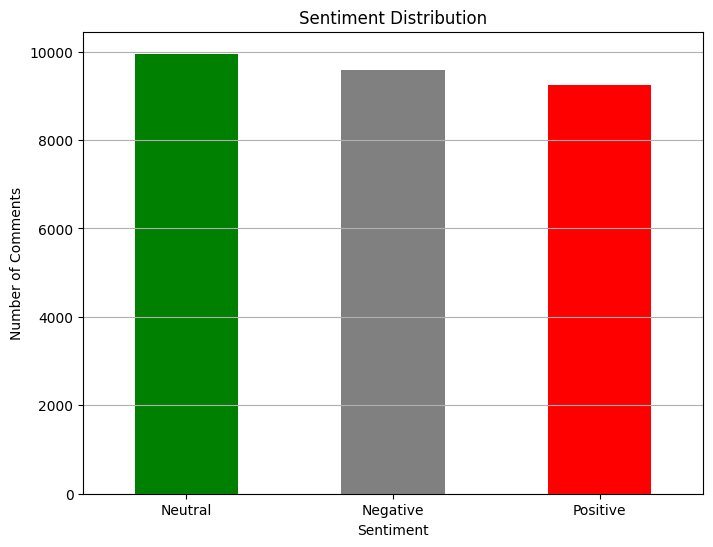

In [10]:
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment category
sentiment_counts = senti_df['Sentiment'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'gray', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

df = pd.read_csv('comment_data_with_sentimentam.csv')
df['Comment'] = df['Comment'].fillna('')
df['Docket ID'] = "Docket_1"   # <-- add dummy ID since only one exists

result_df = pd.DataFrame()
grouped = df.groupby(['Docket ID', 'Sentiment'])

for (docket_id, sentiment), group in grouped:
    cluster_df = group.copy()
    vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
    tfidf_matrix = vectorizer.fit_transform(cluster_df['Comment'])
    tfidf_scores = tfidf_matrix.sum(axis=1).A1
    cluster_df['TF-IDF Score'] = tfidf_scores
    result_df = pd.concat([result_df, cluster_df])

result_df = result_df.sort_values(
    by=['Docket ID', 'Sentiment', 'TF-IDF Score'],
    ascending=[True, True, False]
).reset_index(drop=True)

for (docket_id, sentiment), group in result_df.groupby(['Docket ID', 'Sentiment']):
    print(f"Docket ID: {docket_id}, Sentiment: {sentiment}")
    print(group[['Docket ID', 'Sentiment', 'TF-IDF Score', 'Comment']].head(10))
    print("-" * 60)

result_df.to_csv('comment_data_by_docket_tfidf.csv', index=False)


Docket ID: Docket_1, Sentiment: Negative
  Docket ID Sentiment  TF-IDF Score  \
0  Docket_1  Negative     13.655711   
1  Docket_1  Negative     13.516546   
2  Docket_1  Negative     13.394677   
3  Docket_1  Negative     13.196195   
4  Docket_1  Negative     13.164498   
5  Docket_1  Negative     13.134579   
6  Docket_1  Negative     13.049843   
7  Docket_1  Negative     13.009427   
8  Docket_1  Negative     12.968723   
9  Docket_1  Negative     12.959151   

                                             Comment  
0  Subject: Substantive Comment Opposing DHS Dock...  
1  As a current F-1 visa holder and international...  
2  I am writing to express my strong opposition t...  
3  I am writing to express my strong opposition t...  
4  Dear Sir/Madam:\n\nI write to respectfully opp...  
5  Subject: Opposition to DHS Proposed Rule\nDock...  
6  Dear Sir or Madam,\n\nI am writing to respectf...  
7  I write to respectfully oppose the proposed ru...  
8  As a California resident who wo

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Load dataset
df = pd.read_csv('comment_data_with_sentimentam.csv')

# Fill missing comments
df['Comment'] = df['Comment'].fillna('')

# Add dummy Docket ID since only one exists
df['Docket ID'] = "Docket_1"

# Initialize result DataFrame
result_df = pd.DataFrame()

# Group by Docket ID and Sentiment
grouped = df.groupby(['Docket ID', 'Sentiment'])

for (docket_id, sentiment), group in grouped:
    cluster_df = group.copy()
    vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
    tfidf_matrix = vectorizer.fit_transform(cluster_df['Comment'])
    tfidf_scores = tfidf_matrix.sum(axis=1).A1
    cluster_df['TF-IDF Score'] = tfidf_scores
    result_df = pd.concat([result_df, cluster_df])

# Sort results
result_df = result_df.sort_values(
    by=['Docket ID', 'Sentiment', 'TF-IDF Score'],
    ascending=[True, True, False]
).reset_index(drop=True)

# ---- Select top 5% comments per sentiment ----
top_comments = pd.DataFrame()

for (docket_id, sentiment), group in result_df.groupby(['Docket ID', 'Sentiment']):
    top_n = max(1, int(0.05 * len(group)))  # Ensure at least 1
    top_group = group.head(top_n)
    top_comments = pd.concat([top_comments, top_group])

# Save top comments only
top_comments.to_csv('comment_data_by_docket_tfidf_top5.csv', index=False)

print("✅ Top 5% TF-IDF comments saved to 'comment_data_by_docket_tfidf_top5.csv'")


✅ Top 5% TF-IDF comments saved to 'comment_data_by_docket_tfidf_top5.csv'
